In [ ]:
"""
To check the progress of the neuron decomposition

"""

In [125]:
import minfig
du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

# Checking the Decomposition Table

In [116]:
len(minnie.Decomposition())

9

In [117]:
minnie.Decomposition() & "n_vertices > 30000"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branche
864691135132649120,0,0.25,=BLOB=,300957,599634,1,1,0,1,6,175,96,2282100.160032276,1009206.88194751,6741.671,144.327,144.327,379.618,368.731,214,9.377327242156337e-05,1.2228571428571429,807430.021,55,nan,nan,14351599996.784107,44150916.0969944,6288.768673755814,17774.419607298834,260938181.75971103
864691135354891983,0,0.25,=BLOB=,128942,258952,1,1,0,1,8,167,62,3253267.505681401,1368236.8699979088,12046.228,67.805,67.805,114.561,114.561,1,3.073832687455404e-07,0.005988023952095809,10015.817,4,nan,nan,16262253.637170473,16262253.637170473,4.998744680162513,1623.6572250841318,4065563.4092926183
864691135638993211,0,0.25,=BLOB=,47532,106884,0,0,0,1,4,13,5,454387.77865863935,250267.07604334774,26009.017,75.813,75.813,231.058,230.994,6,1.3204580496667636e-05,0.46153846153846156,60629.247,3,nan,nan,438150070.2774035,27075859.41683642,964.2646454330927,7226.711396851151,146050023.42580116
864691135654027202,0,0.25,=BLOB=,74048,152233,0,0,0,1,6,127,48,1399731.566022119,573408.9371628179,8921.974,74.924,74.924,156.595,156.595,0,0.0,0.0,30845.099,5,nan,nan,0.0,0.0,0.0,0.0,0.0
864691135737365140,0,0.25,=BLOB=,705260,1402887,1,1,0,1,8,208,71,4851280.071747796,1440438.35505695,12674.848,389.118,308.377,575.995,468.136,4217,0.0008692551115649606,20.27403846153846,4367221.343,154,nan,nan,256942194377.73453,32438211.775837578,52963.79317988224,58834.25047589453,1668455807.6476269
864691135974422895,0,0.25,=BLOB=,971166,1973071,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,nan,nan,0.0,0.0,0.0,0.0,0.0
864691136143382836,0,0.25,=BLOB=,120311,246718,0,0,0,1,3,136,65,2718817.9698882047,1351634.7178199843,12807.634,72.855,72.855,217.926,217.926,4,1.4712275865104997e-06,0.029411764705882353,89070.918,16,nan,nan,119592863.99966271,28534991.906918842,43.98708016652555,1342.6701631127537,7474553.9999789195
864691136418639511,0,0.25,=BLOB=,73758,160450,0,0,0,1,7,58,17,1379666.1240483974,408598.5437633359,13700.147,71.404,71.404,178.452,178.452,1,7.248130417710545e-07,0.017241379310344827,13855.169,4,nan,nan,116421249.89034271,116421249.89034271,84.38364025980735,8402.730409881158,29105312.472585678
864691136903062706,0,0.25,=BLOB=,347563,721095,0,0,0,1,6,157,93,3864412.7907476784,1687775.4319805806,12469.445,84.413,84.413,400.843,343.774,1569,0.000406012

In [121]:
neuron_obj = (minnie.Decomposition() & "segment_id=864691136903062706").fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [122]:
import neuron_visualizations as nviz
ret_col = nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                      #mesh_resolution="limb",
                      #skeleton_resolution="limb",
                      limb_branch_dict="all",
                     return_color_dict=True)
                  


 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


In [126]:
decimation_version = 0
decimation_ratio = 0.25

key_source =  ((minnie.Decimation).proj(decimation_version='version') & 
                            "decimation_version=" + str(decimation_version) &
                       f"decimation_ratio={decimation_ratio}" &  (minnie.BaylorSegmentCentroidExternal() & "multiplicity>0").proj())
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses)
864691134167328989,0,0.25
864691134221889045,0,0.25
864691134370328784,0,0.25
864691134384033872,0,0.25
864691134409056935,0,0.25
864691134412252598,0,0.25
864691134431433407,0,0.25
864691134434412977,0,0.25
864691134434464524,0,0.25
864691134437394197,0,0.25


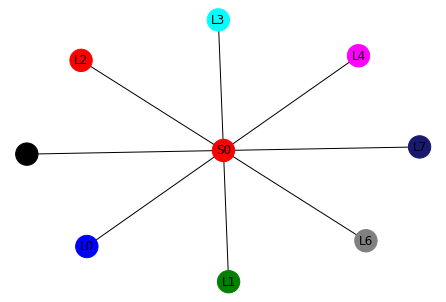

In [17]:
nviz.plot_soma_limb_concept_network(neuron_obj,node_colors=ret_col)

In [27]:
soma_mesh = main_mesh=neuron_obj["S0"].mesh

[<trimesh.Trimesh(vertices.shape=(661, 3), faces.shape=(933, 3))>,
 <trimesh.Trimesh(vertices.shape=(38, 3), faces.shape=(72, 3))>,
 <trimesh.Trimesh(vertices.shape=(38, 3), faces.shape=(70, 3))>,
 <trimesh.Trimesh(vertices.shape=(29, 3), faces.shape=(44, 3))>,
 <trimesh.Trimesh(vertices.shape=(25, 3), faces.shape=(40, 3))>,
 <trimesh.Trimesh(vertices.shape=(21, 3), faces.shape=(32, 3))>,
 <trimesh.Trimesh(vertices.shape=(20, 3), faces.shape=(36, 3))>,
 <trimesh.Trimesh(vertices.shape=(20, 3), faces.shape=(19, 3))>,
 <trimesh.Trimesh(vertices.shape=(20, 3), faces.shape=(27, 3))>,
 <trimesh.Trimesh(vertices.shape=(19, 3), faces.shape=(34, 3))>,
 <trimesh.Trimesh(vertices.shape=(18, 3), faces.shape=(22, 3))>,
 <trimesh.Trimesh(vertices.shape=(17, 3), faces.shape=(30, 3))>,
 <trimesh.Trimesh(vertices.shape=(17, 3), faces.shape=(26, 3))>,
 <trimesh.Trimesh(vertices.shape=(16, 3), faces.shape=(21, 3))>,
 <trimesh.Trimesh(vertices.shape=(16, 3), faces.shape=(28, 3))>,
 <trimesh.Trimesh(verti

In [73]:
import neuron
neuron = reload(neuron)
neuron_obj = neuron.Neuron(neuron_obj)

Recieved another instance of Neuron class in init -- so just copying data


In [76]:
tu = reload(tu)

[<trimesh.Trimesh(vertices.shape=(13, 3), faces.shape=(22, 3))>,
 <trimesh.Trimesh(vertices.shape=(13, 3), faces.shape=(22, 3))>,
 <trimesh.Trimesh(vertices.shape=(12, 3), faces.shape=(20, 3))>,
 <trimesh.Trimesh(vertices.shape=(11, 3), faces.shape=(18, 3))>,
 <trimesh.Trimesh(vertices.shape=(11, 3), faces.shape=(18, 3))>,
 <trimesh.Trimesh(vertices.shape=(10, 3), faces.shape=(20, 3))>,
 <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(18, 3))>]

In [26]:
nviz.plot_objects(main_mesh=neuron_obj["S0"].mesh,
                meshes=neuron_obj.non_soma_touching_meshes,
                  meshes_colors="random")

In [20]:
ret_col = nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                      #mesh_resolution="limb",
                      #skeleton_resolution="limb",
                        mesh_soma=False,
                      limb_branch_dict=dict(L6="all"))
                  


 Working on visualization type: mesh

 Working on visualization type: skeleton
working on soma border vertices
Working on  new stand alone scatter points


In [11]:
nviz.plot_spines(neuron_obj)


 Working on visualization type: mesh
Working on  new stand alone scatter points
